Atividade 3

π via Monte Carlo:

(Etapa 1) Considere um círculo de raio r=1 inscrito em um quadrado de lado 2r=2. A área do círculo é πr2=π. A área do quadrado é 4. A razão entre a área do círculo e a área do quadrado é π/4. Se gerarmos N pontos aleatórios uniformemente distribuídos no quadrado, a fração de pontos que cairão dentro do círculo será π/4. Assim, podemos estimar π como 4 vezes a fração de pontos que caíram dentro do círculo. Como visto em aula, pode considerar o círculo e quadrados completos, ou apenas o primeiro quadrante. Varie o número de pontos sorteados N para ver como o resultado muda. 

(Etapa 2) Modifique sua função pi_monte_carlo(N) para que agora receba um booleando retorna_pontos que indica se a função deve retornar os pontos sorteados separados em duas listas: dentro e fora. Usando estas listas, faça um gráfico dos pontos sorteados, com os pontos dentro do círculo em azul e os pontos fora em vermelho.

Estimativa de π: 3.137356


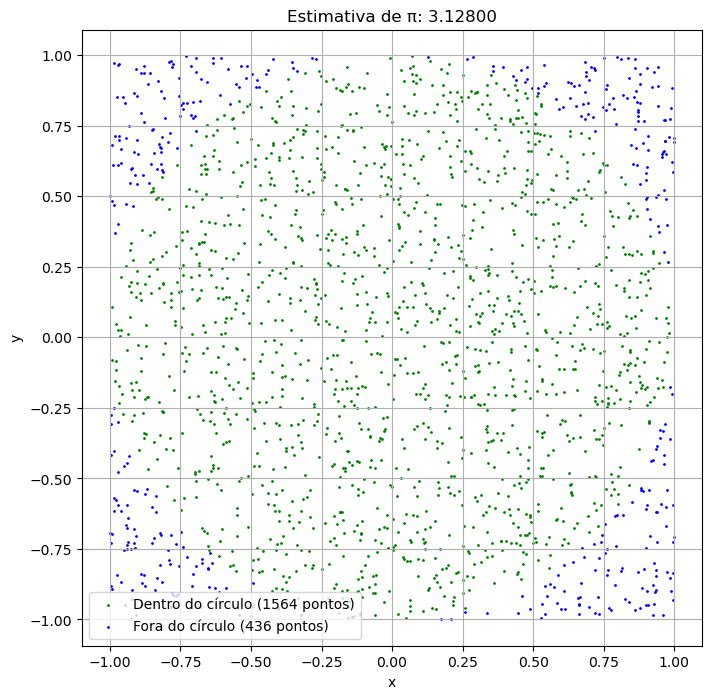

3.128

In [12]:
import random
import matplotlib.pyplot as plt
import numpy as np


def pi_montecarlo(num_pontos, plotar=False):
    '''
    Calcula uma estimativa de pi usando o método de Monte Carlo.

    Args:
        num_pontos: número de pontos a serem gerados.
        plotar: se True, mostra o gráfico com os pontos gerados (não recomendado para num_pontos grande)
    Returns:
        4 * (dentro_circulo / num_pontos): estimativa de pi.
    '''
    dentro_circulo = 0
    x_dentro = []
    y_dentro = []
    x_fora = []
    y_fora = []

    for _ in range(num_pontos):
        x = random.uniform(-1, 1)  # números aleatórios para x
        y = random.uniform(-1, 1)  # números aleatórios para y
        r = x**2 + y**2  # distância

        if r <= 1:
            dentro_circulo += 1
            if plotar:
                x_dentro.append(x)
                y_dentro.append(y)
        elif plotar:
            x_fora.append(x)
            y_fora.append(y)
    
    pi_estimado = 4 * (dentro_circulo / num_pontos)
    
    if plotar:
        # Gráfico 
        plt.figure(figsize=(8, 8))
        plt.scatter(x_dentro, y_dentro, color='green', s=1, 
                   label=f'Dentro do círculo ({dentro_circulo} pontos)')
        plt.scatter(x_fora, y_fora, color='blue', s=1, 
                   label=f'Fora do círculo ({num_pontos - dentro_circulo} pontos)')
        plt.title(f'Estimativa de π: {pi_estimado:.5f}')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.grid()
        plt.axis('equal')
        plt.show()

    return pi_estimado

# Número de pontos a serem gerados
num_pontos = 1000000
pi_estimado = pi_montecarlo(num_pontos)
print(f"Estimativa de π: {pi_estimado}")

# Para visualizar o gráfico (com menos pontos)
pi_montecarlo(2000, plotar=True)

(etapa 4) Implemente uma versão eficiente do cálculo de π via Monte Carlo, que não use loops e ifs explícitos, mas sim operações vetorizadas do numpy. Compare o tempo de execução desta versão com a versão lenta que usa loops e ifs.

3.1488


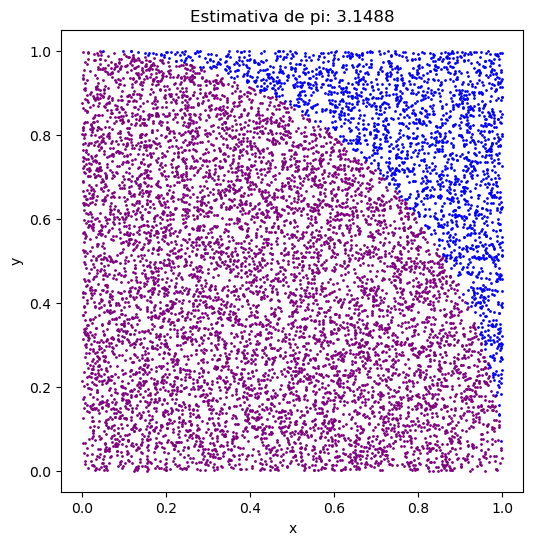

In [5]:
#Etapa 4
import numpy as np
import matplotlib.pyplot as plt
def pi_monte_carlo(N, retorna_pontos = False):
    '''
    Calcula uma estimativa de pi usando o método de Monte Carlo.
    Temos um círculo de raio 1 inscrito em um quadrado de lado 2.
    A área considerada é a do primeiro quadrante do círculo.
    A área do círculo é pi*r^2 e a do quadrado é (2r)^2 = 4.


    Args:
        N: número de pontos a serem gerados.
        Ac: Área do círculo.
        Aq: Área do quadrado.
        estimativa_pi: estimativa de pi.
    Returns:    
        estimativa_pi: estimativa de pi.
        Plota gráfico com os números aleatórios
    '''




rng = np.random.default_rng(seed=42)#Gera números aleatórios
N = 10000 #Quantidade de números aleatórios gerados
x = rng.uniform(0,1,N) #pontos no eixo x
y = rng.uniform(0,1, N) #pontos no eixo y
r = np.sqrt(x**2 + y**2)
dentro = (r <= 1)
fora = ~dentro
estimativa_pi = 4*sum(dentro)/N
print(estimativa_pi)

#Gráfico
retorna_pontos = True
plt.figure(figsize=(6,6))
plt.scatter(x[dentro], y[dentro], color='purple', s=1, label=f'Dentro do círculo ({np.sum(dentro)} pontos)')
plt.scatter(x[fora], y[fora], color='blue', s=1, label=f'Fora do círculo ({np.sum(fora)} pontos)')

plt.title('Estimativa de pi: {}'.format(estimativa_pi))
plt.xlabel('x')
plt.ylabel('y')
plt.plot()
plt.gca().set_aspect('equal')

#retorna pontos
#if retorna_pontos:
 #     return estimativa_pi, dentro, fora
 #   else:
 #       return estimativa_pi

#Arrumar eixos:
#caso 1 (todos os eixos)
#  plt.plot(...)
#  plt.gca().set_aspect('equal')

#caso 2 (cada eixo)
#  ax.plot(...)
#  ax.set_aspect('equal')


#Teste
pi_monte_carlo(2000) #Teste da função 

In [9]:
%timeit estimativa_pi = pi_monte_carlo(100000) #Teste de tempo da função

74.1 ns ± 2.61 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [13]:
%timeit estimativa_pi = pi_montecarlo(100000) #Teste de tempo da função

109 ms ± 5.38 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
